In [169]:
%matplotlib inline
import numpy as np
import pandas
from sklearn.linear_model import SGDRegressor
import scipy
import matplotlib.pyplot as plt
from ggplot import *
import datetime
from pandasql import *
from matplotlib.ticker import FuncFormatter, MultipleLocator
import statsmodels.api as sm
#plt.rcParams['figure.figsize'] = (15, 8)

In [170]:
def normalize_features(features):

    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features


def normalize_features(features):
    
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

In [5]:
def recover_params(means, std_devs, norm_intercept, norm_params):
    
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

In [6]:
def linear_regression(features, values):
        
    model = SGDRegressor(n_iter=125)
    results = SGDRegressor(n_iter=125).fit(features, values)
    intercept = results.intercept_
    params = results.coef_
    
    return intercept, params

In [7]:
def predictions(dataframe):
    
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['mindewpti', 'precipi', 'rain', 'Hour', 'mintempi', 'maxdewpti', 'fog', 'meanpressurei','meanwindspdi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions

In [8]:
data_df = pandas.read_csv('E:/Udacity/Project 2/turnstile_data_master_with_weather.csv')

In [9]:
print predictions(data_df)

[ 2711.36503379  2990.98252148  3270.60000916 ...,   687.16389393
   687.16389393   687.16389393]


In [10]:
def compute_r_squared(data, predictions):
        
    r_squared = 1 - (np.sum((data-predictions)**2)/np.sum((data-np.mean(data))**2))
    
    return r_squared

In [11]:
print compute_r_squared(data_df['ENTRIESn_hourly'], predictions(data_df))

0.440384505239


In [12]:
def plot_residuals(turnstile_weather, predictions):
        
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist(range=(-5000.0, 5000), bins=200.0)
    plt.xlabel('Variance From Prediction')
    plt.ylabel('Frequency')
    return plt

<module 'matplotlib.pyplot' from 'C:\Anaconda\lib\site-packages\matplotlib\pyplot.pyc'>


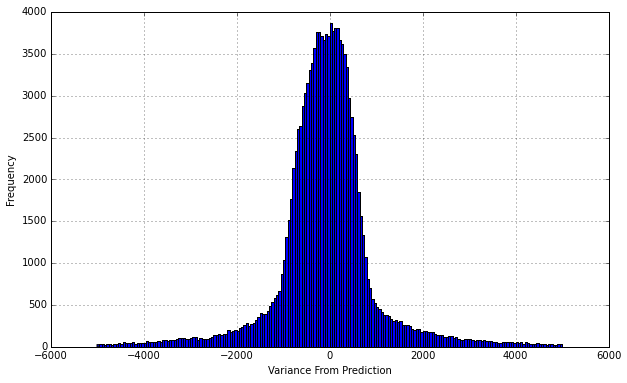

In [13]:
print plot_residuals(data_df, predictions(data_df))

In [14]:
def linear_regression_ols(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    
    features=sm.add_constant(features)
    model=sm.OLS(values, features)
    results=model.fit()
    intercept=results.params[0]
    params=results.params[1:]
    
    return intercept, params

In [15]:
def predictions_ols(dataframe):
    
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'Hour', 'fog','maxdewpti','maxpressurei','meanwindspdi', 'mintempi', 'mindewpti']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression_ols(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions, params

In [16]:
print compute_r_squared(data_df['ENTRIESn_hourly'], predictions_ols(data_df)[0])

0.46019524171


In [17]:
print predictions_ols(data_df)[1]

rain            -143.505987
precipi          -11.290234
Hour              67.409037
fog               57.141978
maxdewpti         28.993104
maxpressurei    -259.574378
meanwindspdi      19.947620
mintempi         -25.978627
mindewpti        -11.201376
unit_R001       2444.499154
unit_R002       -616.547747
unit_R003      -1314.096349
unit_R004       -992.122629
unit_R005      -1003.219586
unit_R006       -931.557509
unit_R007      -1158.044917
unit_R008      -1117.940464
unit_R009      -1189.495185
unit_R010       3045.064063
unit_R011       6532.171458
unit_R012       5968.482847
unit_R013        983.181232
unit_R014       2502.976144
unit_R015        639.115365
unit_R016       -551.590471
unit_R017       2726.609755
unit_R018       4430.966199
unit_R019       1396.105439
unit_R020       4994.916362
unit_R021       2968.900212
                   ...     
unit_R450      -1019.388404
unit_R451       -591.057187
unit_R452       4232.664630
unit_R453        326.162793
unit_R454      -1326

<module 'matplotlib.pyplot' from 'C:\Anaconda\lib\site-packages\matplotlib\pyplot.pyc'>


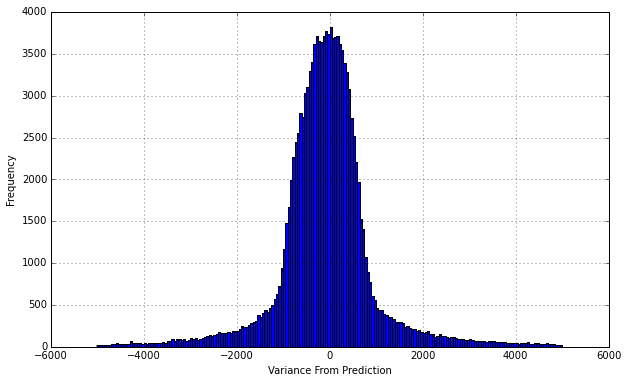

In [18]:
print plot_residuals(data_df, predictions_ols(data_df)[0])

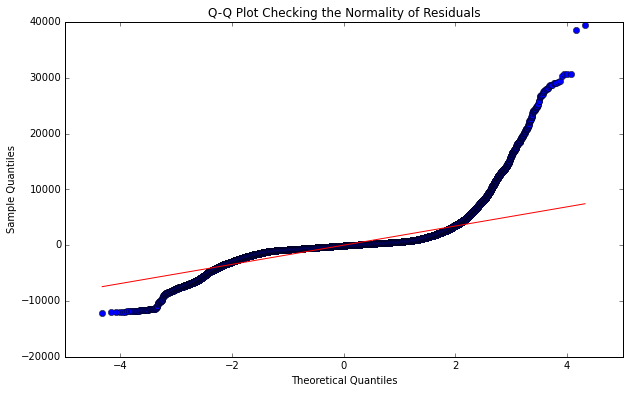

In [19]:
z=(data_df['ENTRIESn_hourly'] - predictions_ols(data_df)[0])

sm.qqplot(z, dist = 'norm', line='s', fit=False)
plt.title("Q-Q Plot Checking the Normality of Residuals")
plt.show()

In [171]:
def plot_weather_data(turnstile_weather):
    
    pandas.options.mode.chained_assignment = None
       
    select_df = turnstile_weather[['DATEn','ENTRIESn_hourly','rain']]
    
    select_df['Day'] = select_df['DATEn'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d').strftime('%a'))
    
    new_df = '''
        SELECT DATEn, sum(ENTRIESn_hourly), rain, Day
        FROM select_df
        GROUP BY DATEn, rain;
        '''
    
    d = sqldf(new_df, locals())
    
    d.columns = ['DATE', 'ENTRIES', 'RAIN', 'DAY']
    
    avg_df = '''
        SELECT DAY, avg(ENTRIES), RAIN
        FROM d
        GROUP BY DAY, RAIN
        '''
    
    e = sqldf(avg_df, locals())
    temp = pd.DatetimeIndex(e['DAY'])
    e['DayNum'] = temp.dayofweek
    
    e = e.sort('DayNum')
    e.columns = ['DAY', 'AVG_ENTRIES', 'RAIN','DayNum']
    
    no_rain = '''
        SELECT DAY, AVG_ENTRIES, RAIN, DayNum
        FROM e
        WHERE RAIN = 0
        GROUP BY DayNum;
        '''
    nr = sqldf(no_rain, locals())

    yes_rain = '''
        SELECT DAY, AVG_ENTRIES, RAIN, DayNum
        FROM e
        WHERE RAIN = 1
        GROUP BY DayNum;
        '''
    yr = sqldf(yes_rain, locals())
    
    days = yr['DAY'].to_dict()
    
      
    width = 0.4
    plt.bar(nr['DayNum'],nr['AVG_ENTRIES'], width, color='yellow', align='edge', label='No Rain')
    plt.bar(yr['DayNum'],yr['AVG_ENTRIES'], width, color='blue', align='center', label='Rain')
    plt.xticks(np.arange(len(days))+0.1, days)
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Total Entries')
    plt.title('Average Total Entries Per Day')
    plt.legend()

    return  plt.show()

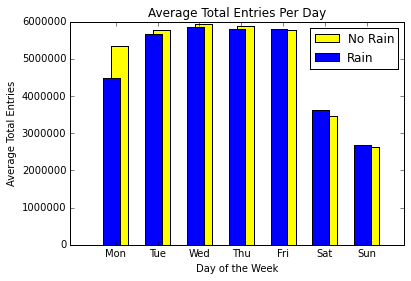

None


In [172]:
print plot_weather_data(data_df)

In [427]:
def plot_weather_data_2(turnstile_weather):
        
    e = turnstile_weather[['ENTRIESn_hourly', 'EXITSn_hourly', 'Hour', 'DATEn']]
    
    e['Day'] = e['DATEn'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d').strftime('%a'))
    
    e['Riders'] = e['ENTRIESn_hourly'] + e['EXITSn_hourly']
    
    df = '''
    SELECT avg(Riders), Hour
    FROM e
    WHERE (Day <> 'Sat' AND Day <> 'Sun') 
    GROUP BY Hour;
    '''
    
    new_df = sqldf(df, locals())
    
    new_df.columns = ['Average Riders', 'Hour of the Day']
       
    plot = ggplot(new_df, aes('Hour of the Day', 'Average Riders')) + geom_line(colour = "green", size = 10) +geom_point(colour = "green", size = 20) + \
        xlim(0,23) + ylim(0,6000) + scale_x_continuous(breaks=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)) + \
        ggtitle('Average Riders per Hour: Weekdays Only') + xlab('Hour of the Day') + ylab('Average Riders')
    
    
    return plot

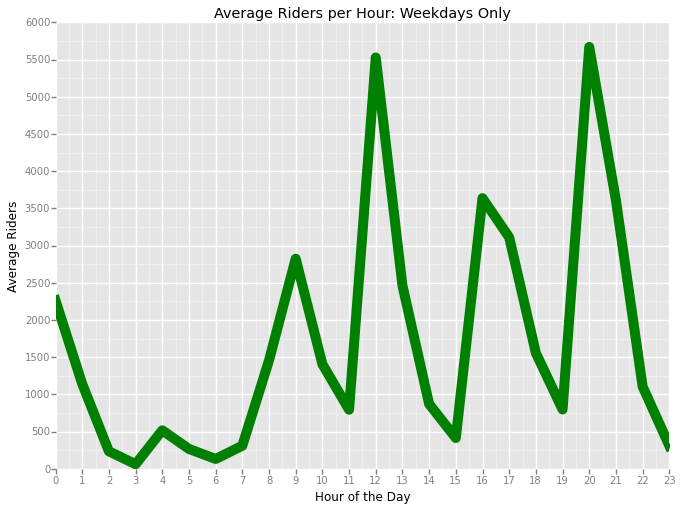

<ggplot: (46107912)>


In [428]:
print plot_weather_data_2(data_df)

In [165]:
def plot_weather_data_3(turnstile_weather):
    
    pandas.options.mode.chained_assignment = None
    
    
    count_df = turnstile_weather[['DATEn','ENTRIESn_hourly','rain']]
    
    count_df['Day'] = count_df['DATEn'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d').strftime('%a'))
    
    new_df = '''
        SELECT DATEn, sum(ENTRIESn_hourly), rain, Day
        FROM count_df
        GROUP BY DATEn, rain;
        '''
    
    f = sqldf(new_df, locals())
    
    f.columns = ['DATE', 'ENTRIES', 'RAIN', 'DAY']
    
    h = f['RAIN'].value_counts()
    
    select_df = turnstile_weather[['ENTRIESn_hourly','rain']]
        
    rain_df = '''
        SELECT ENTRIESn_hourly, rain
        FROM select_df
        WHERE rain==1 and ENTRIESn_hourly>0;
        '''
    
    d = sqldf(rain_df, locals())
    
    d.columns = ['Entries', 'Rain']
        
    no_rain_df = '''
        SELECT ENTRIESn_hourly, rain
        FROM select_df
        WHERE rain==0 and ENTRIESn_hourly>0;
        '''
    
    e = sqldf(no_rain_df, locals())
    
    e.columns = ['Entries', 'Rain']
    
    '''
    d_weight_value = float(h[0])/float((h[1]+h[0]))
    e_weight_value = float(h[1])/float((h[1]+h[0]))
    
    d_array = []
    for i in d['Rain']:
        d_array.append(d_weight_value)
        
    e_array = []
    for i in e['Rain']:
        e_array.append(e_weight_value)    
    '''
    
    
    
    n, bins, patches = plt.hist(e['Entries'], bins=250, facecolor='yellow', alpha=1, label=['No Rain'])
    n, bins, patches = plt.hist(d['Entries'], bins=250, facecolor='blue', alpha=0.85, label=['Rain'])
    
    plt.xlim(0,12000)
    plt.ylim(0,28500)
    plt.xlabel('Riders Per Hour')
    plt.ylabel('Frequency')
    plt.title('Frequency of Ridership Levels')
    plt.legend()
    plt.figure(figsize=(3,4))

    return plt.show()

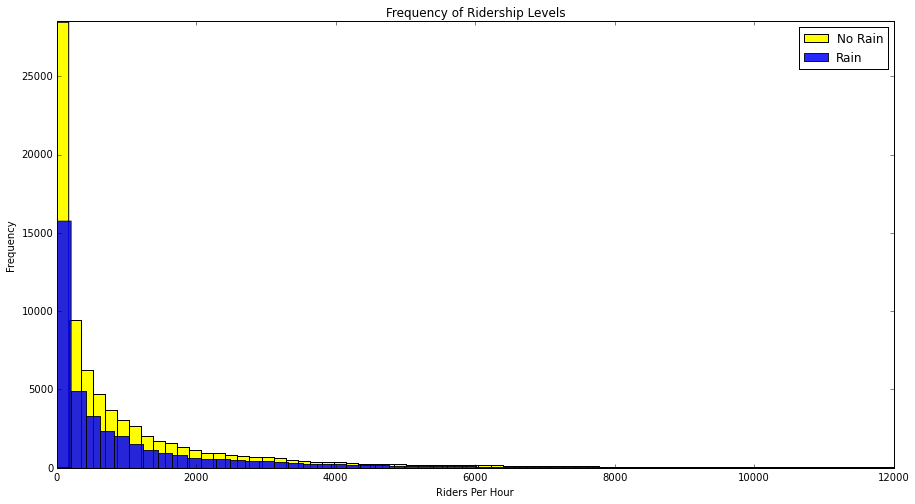

None


In [166]:
print plot_weather_data_3(data_df)